In [3]:
import threading
class A(threading.Thread):
    def __init__(self):
        threading.Thread.__init__(self)
    def run(self):
        for i in range(10):
            print("我是线程A")
class B(threading.Thread):
    def __init__(self):
        threading.Thread.__init__(self)
    def run(self):
        for i in range(10):
            print("我是线程B")

In [5]:
t1 = A()
t1.start()
t2 = B()
t2.start()


我是线程A我是线程B

我是线程B我是线程A

我是线程B
我是线程A我是线程B

我是线程A我是线程B

我是线程A我是线程B

我是线程A我是线程B

我是线程A我是线程B

我是线程A我是线程B

我是线程A我是线程B

我是线程A


In [ ]:
import queue
a = queue.Queue()
a.put("hello")
a.task_done()
a.put("java")
a.task_done()


In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()


In [5]:
cd = np.corrcoef(iris.data.T)
print(cd)

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


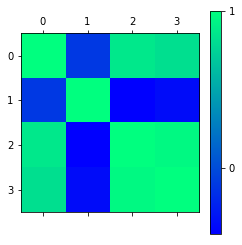

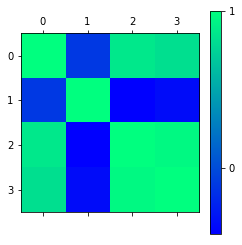

In [10]:
import matplotlib.pyplot as plt
img = plt.matshow(cd, cmap = plt.cm.winter)
plt.colorbar(img, ticks=[-1,0,1])
plt.show()

explained variance ratio (first two components): [ 0.92461621  0.05301557]


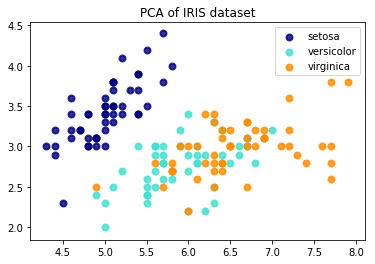

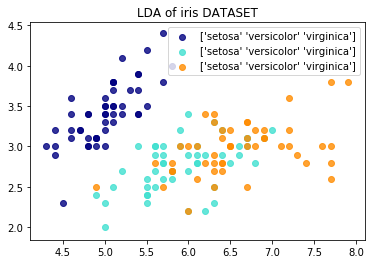

In [3]:


import matplotlib.pyplot as plt
from sklearn import *
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

x = iris.data
y = iris.target
tnames = iris.target_names

pca = PCA(n_components= 2)
model = pca.fit(x).transform(x)


lad = LinearDiscriminantAnalysis(n_components=2)
m2 = lad.fit(x, y).transform(x)

print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw =2

for color, i, tname in zip(colors, [0, 1, 2], tnames):
    plt.scatter(x[y == i, 0], x[y == i, 1], color=color, alpha=0.8, lw=lw, label=tname)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i ,tname in zip(colors, [0, 1, 2], tnames):
    plt.scatter(x[y == i, 0], x[y == i, 1], alpha=0.8, color=color, label=tnames)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of iris DATASET')
plt.show()


In [2]:
print(dat.head(5))

   dept Region    Department  Crime_pers  Crime_prop  Literacy  Donations  \
0     1      E           Ain       28870       15890        37       5098   
1     2      N         Aisne       26226        5521        51       8901   
2     3      C        Allier       26747        7925        13      10973   
3     4      E  Basses-Alpes       12935        7289        46       2733   
4     5      E  Hautes-Alpes       17488        8174        69       6962   

   Infants  Suicides MainCity   ...     Crime_parents  Infanticide  \
0    33120     35039    2:Med   ...                71           60   
1    14572     12831    2:Med   ...                 4           82   
2    17044    114121    2:Med   ...                46           42   
3    23018     14238     1:Sm   ...                70           12   
4    23076     16171     1:Sm   ...                22           23   

   Donation_clergy  Lottery  Desertion  Instruction  Prostitutes  Distance  \
0               69       41         55

In [8]:
model = smf.ols('Lottery~Literacy + np.log(Pop1831)', data=dat).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Tue, 24 Oct 2017   Prob (F-statistic):           1.90e-08
Time:                        18:11:18   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [9]:
m1 = smf.ols('Lottery~Literacy ', data=dat).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     12.89
Date:                Tue, 24 Oct 2017   Prob (F-statistic):           0.000555
Time:                        18:11:58   Log-Likelihood:                -392.11
No. Observations:                  86   AIC:                             788.2
Df Residuals:                      84   BIC:                             793.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.0896      6.265     10.230      0.0

In [11]:
print(sm.stats.anova_lm(m1,model))

D:\ancoda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\ancoda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\ancoda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


   df_resid          ssr  df_diff      ss_diff          F    Pr(>F)
0      84.0  45947.21357      0.0          NaN        NaN       NaN
1      83.0  34529.42878      1.0  11417.78479  27.445462  0.000001
